In [6]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats
import pingouin as pg

In [7]:
df = pd.read_csv('df_results.csv')
df['architecture'] = df['Model'].apply(lambda x: x.split('_', 3)[-1])
print(f"The sample is composed by {df.shape[0]} diferent models")
print(f"DataFrame columns ({df.shape[1]}): ", list(df.columns[1:]))
df.set_index('Model', inplace=True)
df.head(5)

The sample is composed by 494 diferent models
DataFrame columns (20):  ['File', 'Model', 'Path', 'F1_Score_Media', 'F1_Score_Desviacion', 'Recall_Media', 'Recall_Desviacion', 'Precision_Media', 'Precision_Desviacion', 'Roc_Auc_Media', 'Roc_Auc_Desviacion', 'Confusion_Matrix_Media', 'Confusion_Matrix_Desviacion', 'config', 'kernel_widths', 'filters', 'dropouts', 'test_suite_thresholds', 'architecture']


,Unnamed: 0,File,Path,F1_Score_Media,F1_Score_Desviacion,Recall_Media,Recall_Desviacion,Precision_Media,Precision_Desviacion,Roc_Auc_Media,Roc_Auc_Desviacion,Confusion_Matrix_Media,Confusion_Matrix_Desviacion,config,kernel_widths,filters,dropouts,test_suite_thresholds,architecture
Model,,,,,,,,,,,,,,,,,,,
model_config1_architecture_3conv_3dense_1,0,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.919075,0.019434,0.931015,0.040273,0.909285,0.026432,0.956776,0.011141,"[[29.66532797858099, 6.033020972780009], [4.41...","[[2.41725373776579, 1.8767963485008359], [2.50...",config1,50_cte,16_cte,0.5_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]",3conv_3dense_1
model_config2_architecture_3conv_3dense_1,1,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.909638,0.024445,0.900748,0.054866,0.922198,0.028768,0.951440,0.013875,"[[30.709504685408294, 4.988844265952699], [6.4...","[[2.4715467728558727, 1.995478633999086], [3.6...",config2,50_cte,16_cte,0.3_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]",3conv_3dense_1
model_config3_architecture_3conv_3dense_1,2,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.916716,0.024682,0.915249,0.054632,0.921490,0.028725,0.956558,0.010844,"[[30.59794734493529, 5.100401606425702], [5.47...","[[2.1582283389714036, 2.0224875103218283], [3....",config3,50_cte,32_cte,0.5_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]",3conv_3dense_1
model_config4_architecture_3conv_3dense_1,3,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.913406,0.027070,0.902852,0.056135,0.927664,0.030870,0.957328,0.013746,"[[31.07541276215975, 4.622936189201249], [6.22...","[[2.467628198062744, 2.1581268493125587], [3.5...",config4,50_cte,32_cte,0.3_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]",3conv_3dense_1
model_config5_architecture_3conv_3dense_1,4,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.922049,0.016820,0.931853,0.031768,0.913685,0.025717,0.959720,0.010629,"[[30.0111557340473, 5.687193217313699], [4.379...","[[1.9253245700271118, 1.7684551528420875], [2....",config5,20_cte,16_cte,0.5_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]",3conv_3dense_1


In [8]:
# df.to_csv('justification.csv')

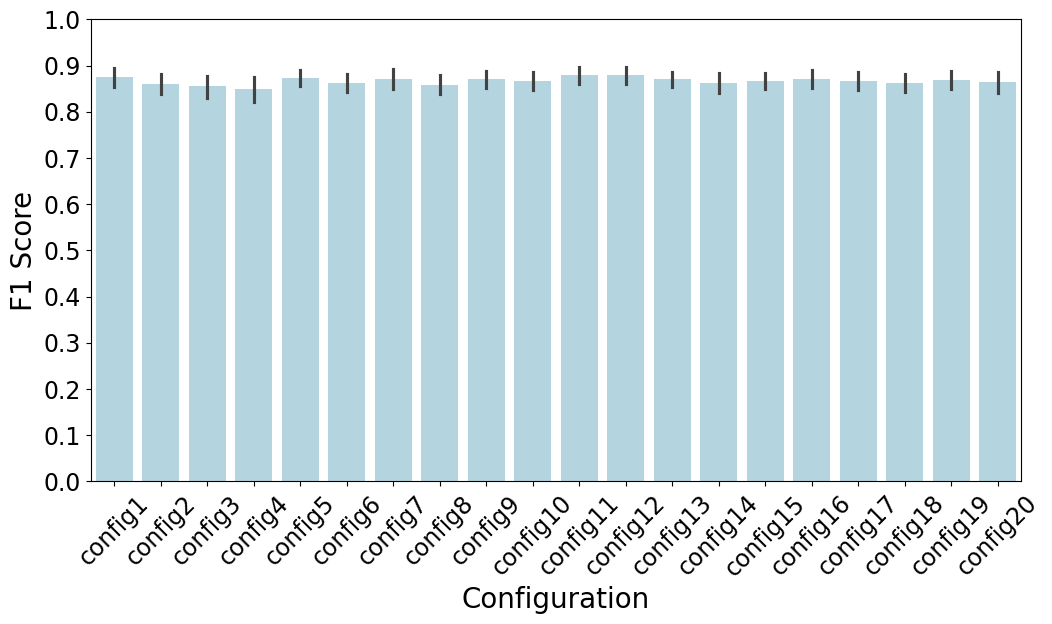

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='config', y='F1_Score_Media', data=df, color='lightblue')
# plt.title('F1 Score based on the configuration')
plt.xlabel('Configuration', fontsize=20)
plt.ylabel('F1 Score', fontsize=20)
plt.ylim(0, 1)
plt.xticks(fontsize=17, rotation=45)
plt.yticks([i/10.0 for i in range(0, 11)], fontsize=17) 
plt.show()

/tmp/ipykernel_10951/2418355404.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['conv_number'] = filtered_df['architecture'].str.extract('(\d+)conv').astype(int)
/tmp/ipykernel_10951/2418355404.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['conv_number'] = filtered_df['architecture'].str.extract('(\d+)conv').astype(int)
/tmp/ipykernel_10951/2418355404.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

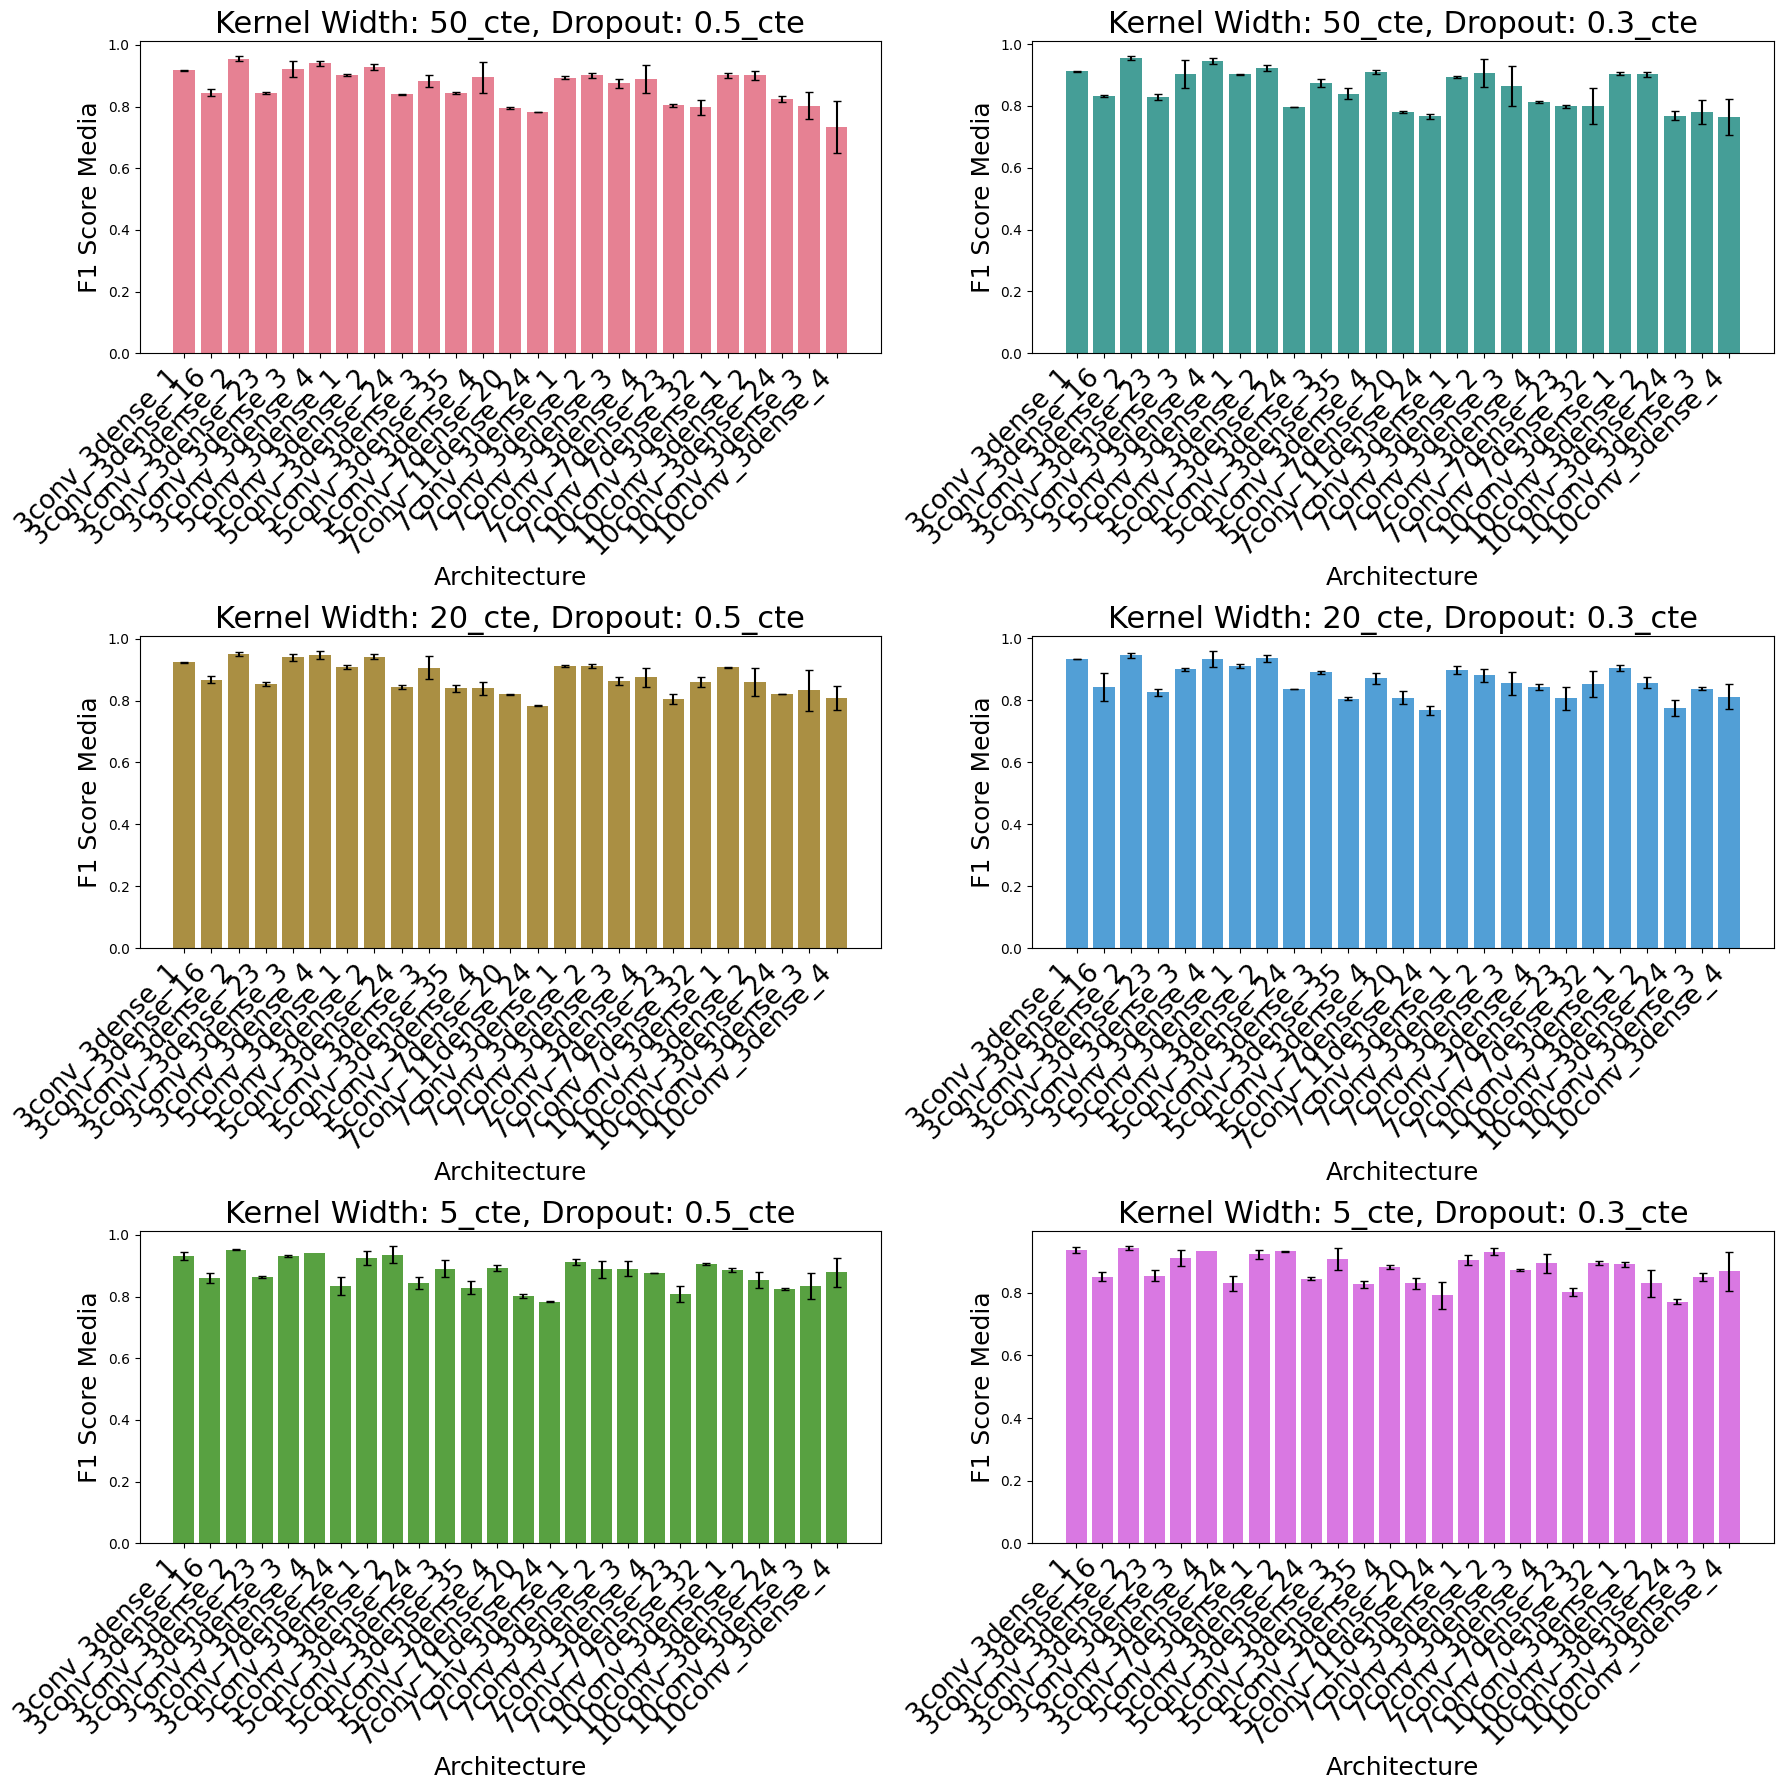

In [13]:
# Obtener valores únicos de kernel widths
unique_kernel_widths = df['kernel_widths'].unique()[:3]  # Seleccionar los primeros 3 valores únicos

# Definir una paleta de colores con el doble de colores necesarios
palette = sns.color_palette("husl", 6)

# Crear una figura y una malla de subplots 3x2
fig, axes = plt.subplots(3, 2, figsize=(18, 18), constrained_layout=True)

# Definir los diferentes valores de dropouts
dropout_values = ['0.5_cte', '0.3_cte']

# Bucle para generar una gráfica por cada valor único de kernel widths y dropout
color_idx = 0  # Inicializar el índice de color
for col_idx, dropout in enumerate(dropout_values):
    for row_idx, kernel_width in enumerate(unique_kernel_widths):
        # Filtrar el dataframe con los parámetros específicos
        filtered_df = df[(df['kernel_widths'] == kernel_width) & (df['dropouts'] == dropout)]

        # Añadir una nueva columna para indicar el número de convoluciones para la ordenación
        filtered_df['conv_number'] = filtered_df['architecture'].str.extract('(\d+)conv').astype(int)

        # Calcular la media y la desviación estándar para cada agrupación de arquitectura
        grouped_df = filtered_df.groupby(['conv_number', 'architecture'])['F1_Score_Media'].agg(['mean', 'std']).reset_index()

        # Ordenar el dataframe agrupado por el número de convoluciones
        grouped_df = grouped_df.sort_values('conv_number')

        # Seleccionar un color diferente para cada gráfico
        color = palette[color_idx]
        color_idx += 1  # Incrementar el índice de color para el próximo gráfico

        # Crear el gráfico en el subplot correspondiente
        ax = axes[row_idx, col_idx]
        sns.barplot(x='architecture', y='mean', data=grouped_df, color=color, ax=ax)

        # Añadir barras de error manualmente
        for i in range(len(grouped_df)):
            ax.errorbar(i, grouped_df['mean'][i], yerr=grouped_df['std'][i], fmt='none', capsize=3, color='black')

        ax.set_xlabel('Architecture', fontsize=18)
        ax.set_ylabel('F1 Score Media', fontsize=18)
        ax.set_title(f'Kernel Width: {kernel_width}, Dropout: {dropout}', fontsize=22)
        ax.tick_params(axis='x', rotation=45, labelsize=19)

        # Desplazar etiquetas del eje x hacia la izquierda
        trans = ax.get_xaxis_transform()
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')
            # label.set_x(label.get_position()[0] - 1/2.54)  

# Ajustar layout para que no haya solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()

/tmp/ipykernel_10951/3421592093.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['conv_number'] = filtered_df['architecture'].str.extract('(\d+)conv').astype(int)
/tmp/ipykernel_10951/3421592093.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['conv_number'] = filtered_df['architecture'].str.extract('(\d+)conv').astype(int)
/tmp/ipykernel_10951/3421592093.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

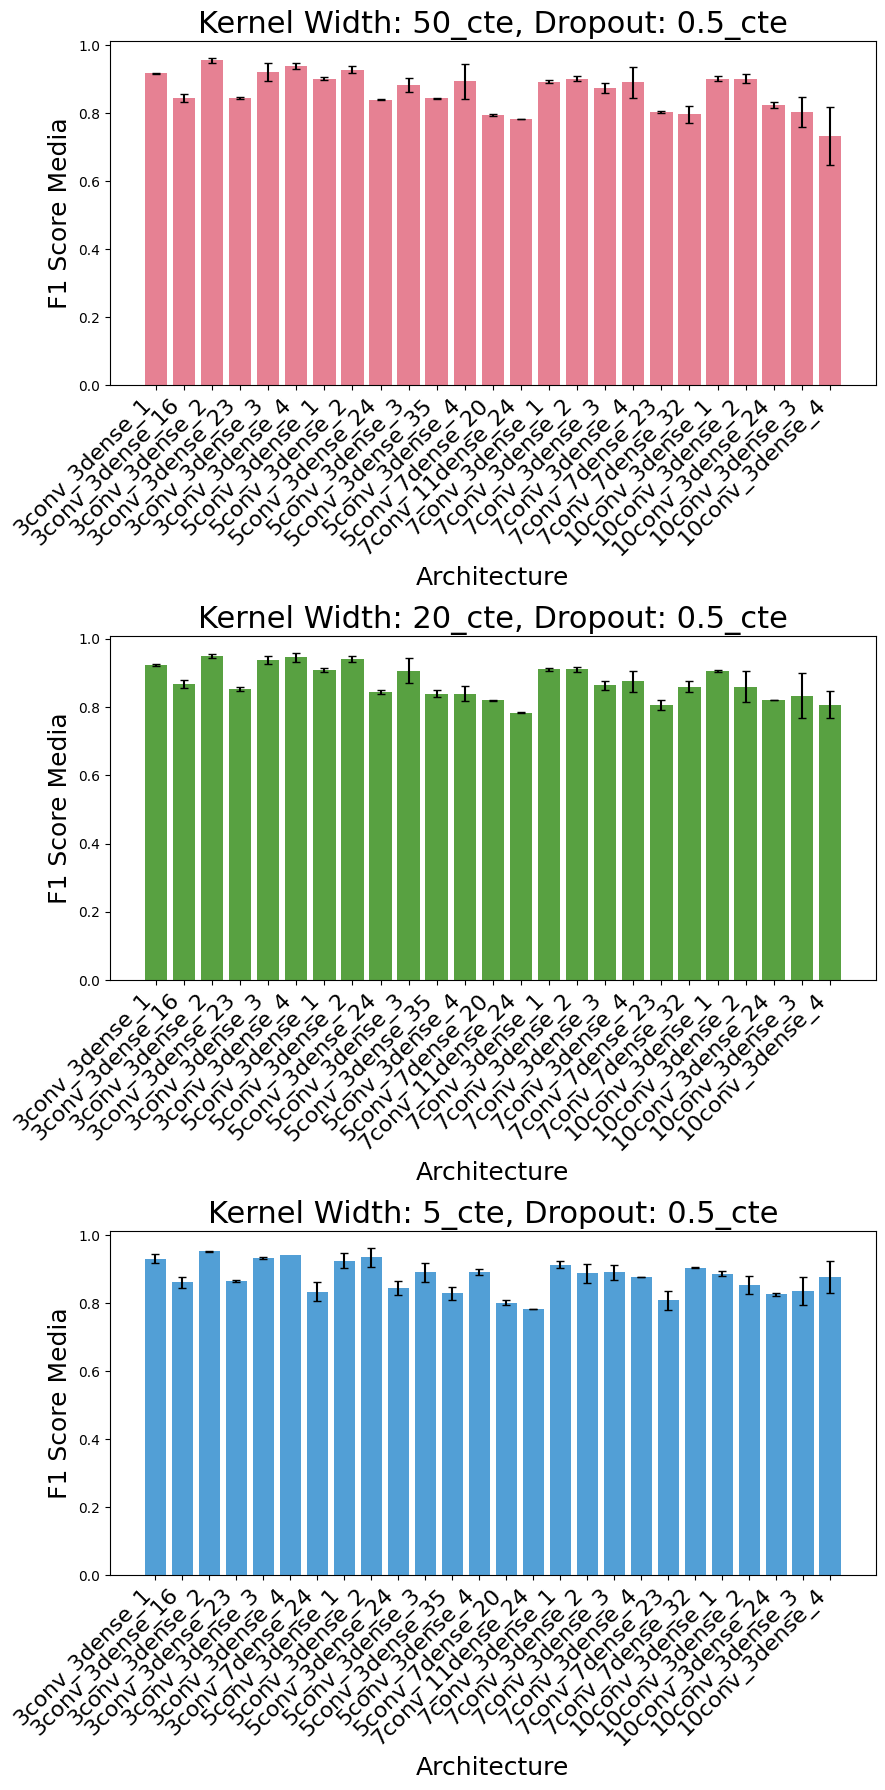

In [15]:
# Obtener valores únicos de kernel widths
unique_kernel_widths = df['kernel_widths'].unique()[:3]  # Seleccionar los primeros 3 valores únicos

# Definir una paleta de colores con el doble de colores necesarios
palette = sns.color_palette("husl", 3)

# Crear una figura y una malla de subplots 3x1
fig, axes = plt.subplots(3, 1, figsize=(9, 18), constrained_layout=True)

# Definir un valor de dropout (puedes ajustar esto según tus necesidades)
dropout = '0.5_cte'

# Bucle para generar una gráfica por cada valor único de kernel widths
color_idx = 0  # Inicializar el índice de color
for row_idx, kernel_width in enumerate(unique_kernel_widths):
    # Filtrar el dataframe con los parámetros específicos
    filtered_df = df[(df['kernel_widths'] == kernel_width) & (df['dropouts'] == dropout)]

    # Añadir una nueva columna para indicar el número de convoluciones para la ordenación
    filtered_df['conv_number'] = filtered_df['architecture'].str.extract('(\d+)conv').astype(int)

    # Calcular la media y la desviación estándar para cada agrupación de arquitectura
    grouped_df = filtered_df.groupby(['conv_number', 'architecture'])['F1_Score_Media'].agg(['mean', 'std']).reset_index()

    # Ordenar el dataframe agrupado por el número de convoluciones
    grouped_df = grouped_df.sort_values('conv_number')

    # Seleccionar un color diferente para cada gráfico
    color = palette[color_idx]
    color_idx += 1  # Incrementar el índice de color para el próximo gráfico

    # Crear el gráfico en el subplot correspondiente
    ax = axes[row_idx]
    sns.barplot(x='architecture', y='mean', data=grouped_df, color=color, ax=ax)

    # Añadir barras de error manualmente
    for i in range(len(grouped_df)):
        ax.errorbar(i, grouped_df['mean'][i], yerr=grouped_df['std'][i], fmt='none', capsize=3, color='black')

    ax.set_xlabel('Architecture', fontsize=18)
    ax.set_ylabel('F1 Score Media', fontsize=18)
    ax.set_title(f'Kernel Width: {kernel_width}, Dropout: {dropout}', fontsize=22)
    ax.tick_params(axis='x', rotation=45, labelsize=16)  # Aumentar el tamaño de las etiquetas del eje x

    # Desplazar etiquetas del eje x hacia la izquierda
    trans = ax.get_xaxis_transform()
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
        # label.set_x(label.get_position()[0] - 1/2.54)  # Desplazar 1 cm hacia la izquierda

# Ajustar layout para que no haya solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()

/tmp/ipykernel_10951/859568005.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['conv_number'] = filtered_df['architecture'].str.extract('(\d+)conv').astype(int)
/tmp/ipykernel_10951/859568005.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['conv_number'] = filtered_df['architecture'].str.extract('(\d+)conv').astype(int)
/tmp/ipykernel_10951/859568005.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

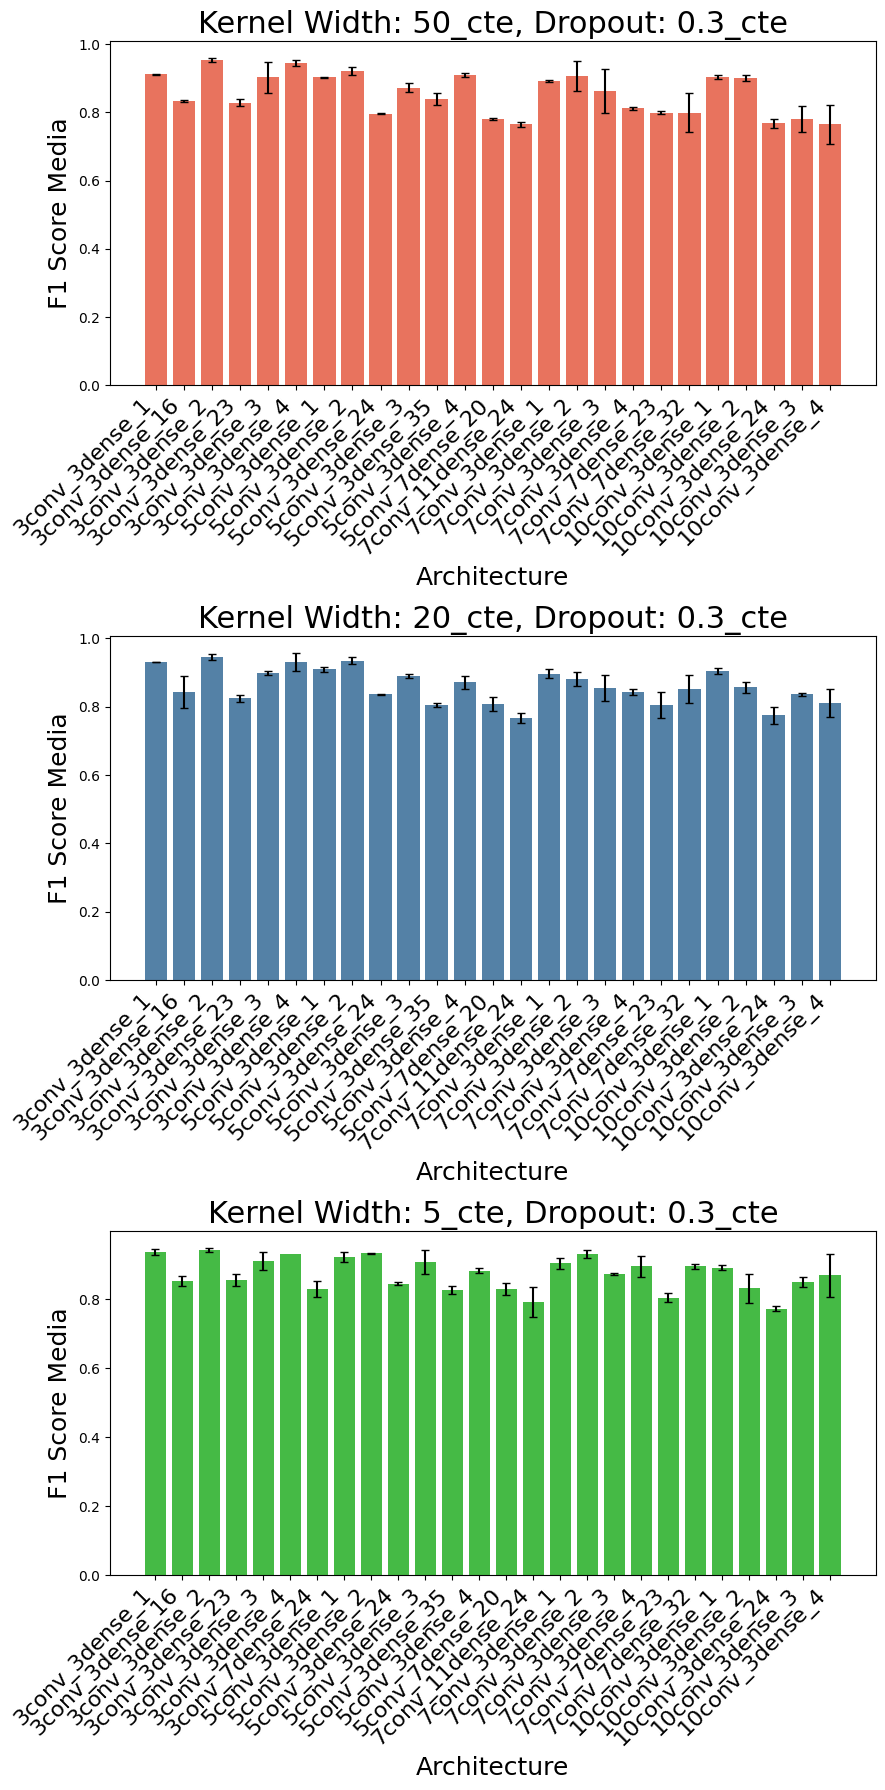

In [18]:
# Obtener valores únicos de kernel widths
unique_kernel_widths = df['kernel_widths'].unique()[:3]  # Seleccionar los primeros 3 valores únicos

# Definir una nueva paleta de colores personalizada
palette = ['#FF6347', '#4682B4', '#32CD32']  # Colores: tomate, azul acero, verde lima

# Crear una figura y una malla de subplots 3x1
fig, axes = plt.subplots(3, 1, figsize=(9, 18), constrained_layout=True)

# Definir un valor de dropout (puedes ajustar esto según tus necesidades)
dropout = '0.3_cte'  # Seleccionar el valor de dropout de la segunda columna

# Bucle para generar una gráfica por cada valor único de kernel widths
color_idx = 0  # Inicializar el índice de color
for row_idx, kernel_width in enumerate(unique_kernel_widths):
    # Filtrar el dataframe con los parámetros específicos
    filtered_df = df[(df['kernel_widths'] == kernel_width) & (df['dropouts'] == dropout)]

    # Añadir una nueva columna para indicar el número de convoluciones para la ordenación
    filtered_df['conv_number'] = filtered_df['architecture'].str.extract('(\d+)conv').astype(int)

    # Calcular la media y la desviación estándar para cada agrupación de arquitectura
    grouped_df = filtered_df.groupby(['conv_number', 'architecture'])['F1_Score_Media'].agg(['mean', 'std']).reset_index()

    # Ordenar el dataframe agrupado por el número de convoluciones
    grouped_df = grouped_df.sort_values('conv_number')

    # Seleccionar un color diferente para cada gráfico
    color = palette[color_idx]
    color_idx += 1  # Incrementar el índice de color para el próximo gráfico

    # Crear el gráfico en el subplot correspondiente
    ax = axes[row_idx]
    sns.barplot(x='architecture', y='mean', data=grouped_df, color=color, ax=ax)

    # Añadir barras de error manualmente
    for i in range(len(grouped_df)):
        ax.errorbar(i, grouped_df['mean'][i], yerr=grouped_df['std'][i], fmt='none', capsize=3, color='black')

    ax.set_xlabel('Architecture', fontsize=18)
    ax.set_ylabel('F1 Score Media', fontsize=18)
    ax.set_title(f'Kernel Width: {kernel_width}, Dropout: {dropout}', fontsize=22)
    ax.tick_params(axis='x', rotation=45, labelsize=16)  # Aumentar el tamaño de las etiquetas del eje x

    # Desplazar etiquetas del eje x hacia la izquierda
    trans = ax.get_xaxis_transform()
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
        # label.set_x(label.get_position()[0] - 1/2.54)  # Desplazar 1 cm hacia la izquierda

# Ajustar layout para que no haya solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()

# 1. Filters

In [21]:
# Número de observaciones por grupo
# ==============================================================================
df.groupby('filters').size()

filters
16_cte    249
32_cte    245
dtype: int64

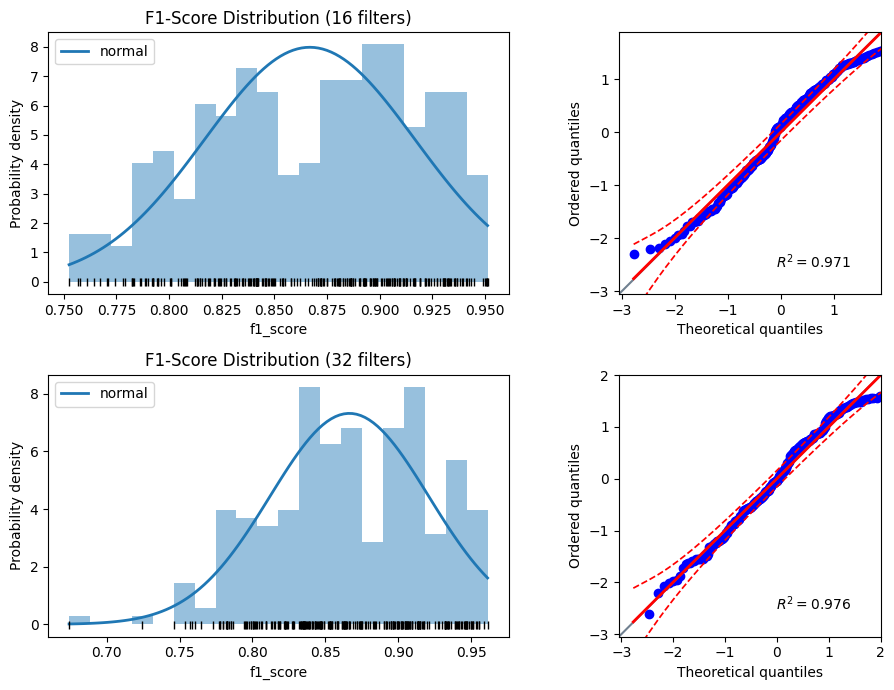

In [22]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

f1_score_16_filters = df.loc[df.filters == '16_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_16_filters)
x_hat = np.linspace(min(f1_score_16_filters), max(f1_score_16_filters), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=f1_score_16_filters, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(f1_score_16_filters, np.full_like(f1_score_16_filters, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('F1-Score Distribution (16 filters)')
axs[0, 0].set_xlabel('f1_score')
axs[0, 0].set_ylabel('Probability density')
axs[0, 0].legend()

pg.qqplot(f1_score_16_filters, dist='norm', ax=axs[0, 1])

f1_score_32_filters = df.loc[df.filters == '32_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_32_filters)
x_hat = np.linspace(min(f1_score_32_filters), max(f1_score_32_filters), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=f1_score_32_filters, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(f1_score_32_filters, np.full_like(f1_score_32_filters, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('F1-Score Distribution (32 filters)')
axs[1, 0].set_xlabel('f1_score')
axs[1, 0].set_ylabel('Probability density')
axs[1, 0].legend()

pg.qqplot(f1_score_32_filters, dist='norm', ax=axs[1, 1])
plt.tight_layout();


In [23]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='F1_Score_Media', group='filters')

,W,pval,normal
filters,,,
16_cte,0.967232,0.000018,False
32_cte,0.975118,0.000269,False


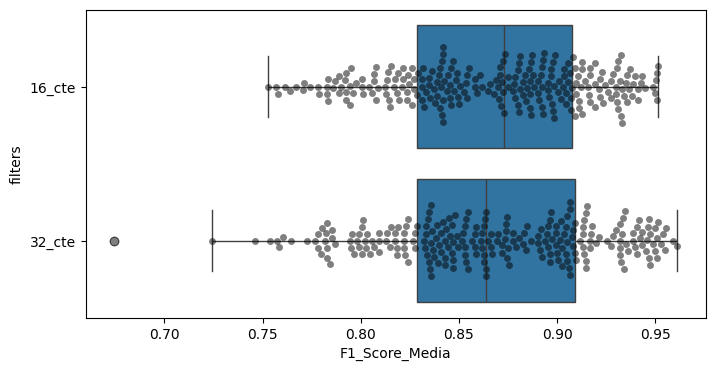

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="filters", x="F1_Score_Media", data=df, ax=ax)
sns.swarmplot(y="filters", x="F1_Score_Media", data=df, color='black', alpha = 0.5, ax=ax);

In [25]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='F1_Score_Media', group='filters')

,W,pval,equal_var
levene,1.29002,0.256597,True


In [26]:
# Test para df independientes (p-value, intervalos de confianza)
# ==============================================================================
filters_16 = df.loc[df.filters == '16_cte', 'F1_Score_Media']
filters_32 = df.loc[df.filters == '32_cte', 'F1_Score_Media']

pg.ttest(x=filters_16, y=filters_32, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.063804,492,two-sided,0.949152,"[-0.01, 0.01]",0.005742,0.1,0.050465


# 2. Dropouts

In [27]:
# Número de observaciones por grupo
# ==============================================================================
df.groupby('dropouts').size()

dropouts
0.3_cte    246
0.5_cte    248
dtype: int64

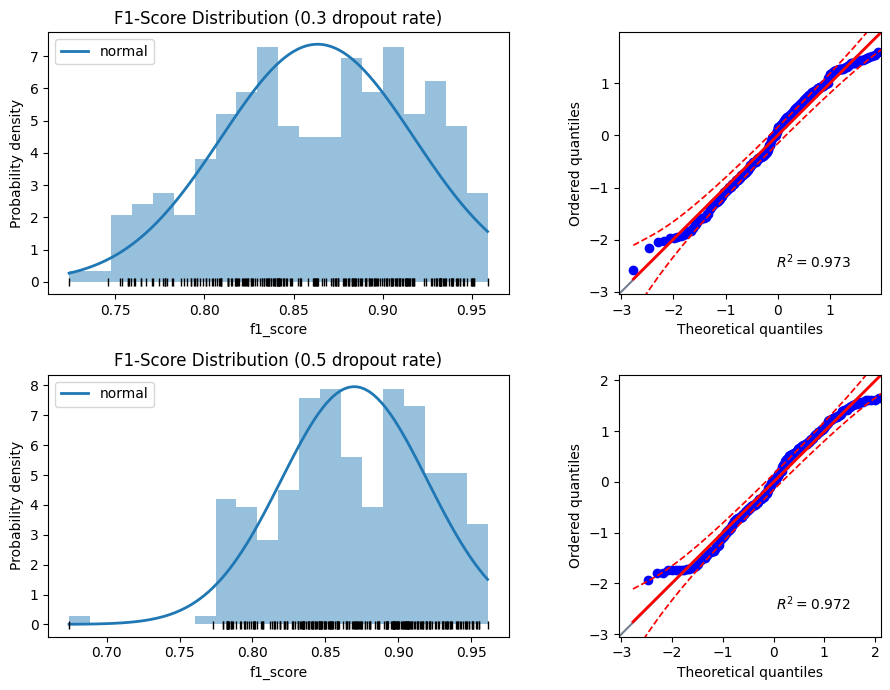

In [28]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

f1_score_dropout_0_3 = df.loc[df.dropouts == '0.3_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_dropout_0_3)
x_hat = np.linspace(min(f1_score_dropout_0_3), max(f1_score_dropout_0_3), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=f1_score_dropout_0_3, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(f1_score_dropout_0_3, np.full_like(f1_score_dropout_0_3, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('F1-Score Distribution (0.3 dropout rate)')
axs[0, 0].set_xlabel('f1_score')
axs[0, 0].set_ylabel('Probability density')
axs[0, 0].legend()

pg.qqplot(f1_score_dropout_0_3, dist='norm', ax=axs[0, 1])

f1_score_dropout_0_5 = df.loc[df.dropouts == '0.5_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_dropout_0_5)
x_hat = np.linspace(min(f1_score_dropout_0_5), max(f1_score_dropout_0_5), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=f1_score_dropout_0_5, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(f1_score_dropout_0_5, np.full_like(f1_score_dropout_0_5, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('F1-Score Distribution (0.5 dropout rate)')
axs[1, 0].set_xlabel('f1_score')
axs[1, 0].set_ylabel('Probability density')
axs[1, 0].legend()

pg.qqplot(f1_score_dropout_0_5, dist='norm', ax=axs[1, 1])
plt.tight_layout();


In [29]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='F1_Score_Media', group='dropouts')

,W,pval,normal
dropouts,,,
0.5_cte,0.970983,0.000060,False
0.3_cte,0.969541,0.000041,False


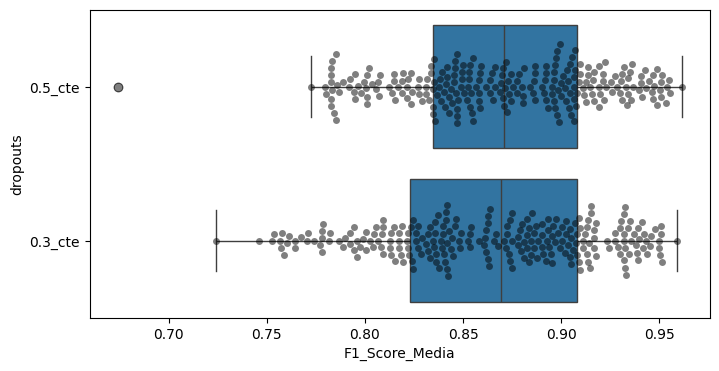

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="dropouts", x="F1_Score_Media", data=df, ax=ax)
sns.swarmplot(y="dropouts", x="F1_Score_Media", data=df, color='black', alpha = 0.5, ax=ax);

In [31]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='F1_Score_Media', group='dropouts')

,W,pval,equal_var
levene,2.535367,0.111963,True


In [32]:
# Test para df independientes (p-value, intervalos de confianza)
# ==============================================================================
dropout_03 = df.loc[df.dropouts == '0.3_cte', 'F1_Score_Media']
dropout_05 = df.loc[df.dropouts == '0.5_cte', 'F1_Score_Media']

pg.ttest(x=dropout_03, y=dropout_05, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.357573,492,two-sided,0.175222,"[-0.02, 0.0]",0.122161,0.245,0.273034


# 3. Kernel Widths

In [33]:
# Número de observaciones por grupo
# ==============================================================================
df.groupby('kernel_widths').size()

kernel_widths
20_cte    100
50_cte    100
5_cte     102
ASC       100
DESC       92
dtype: int64

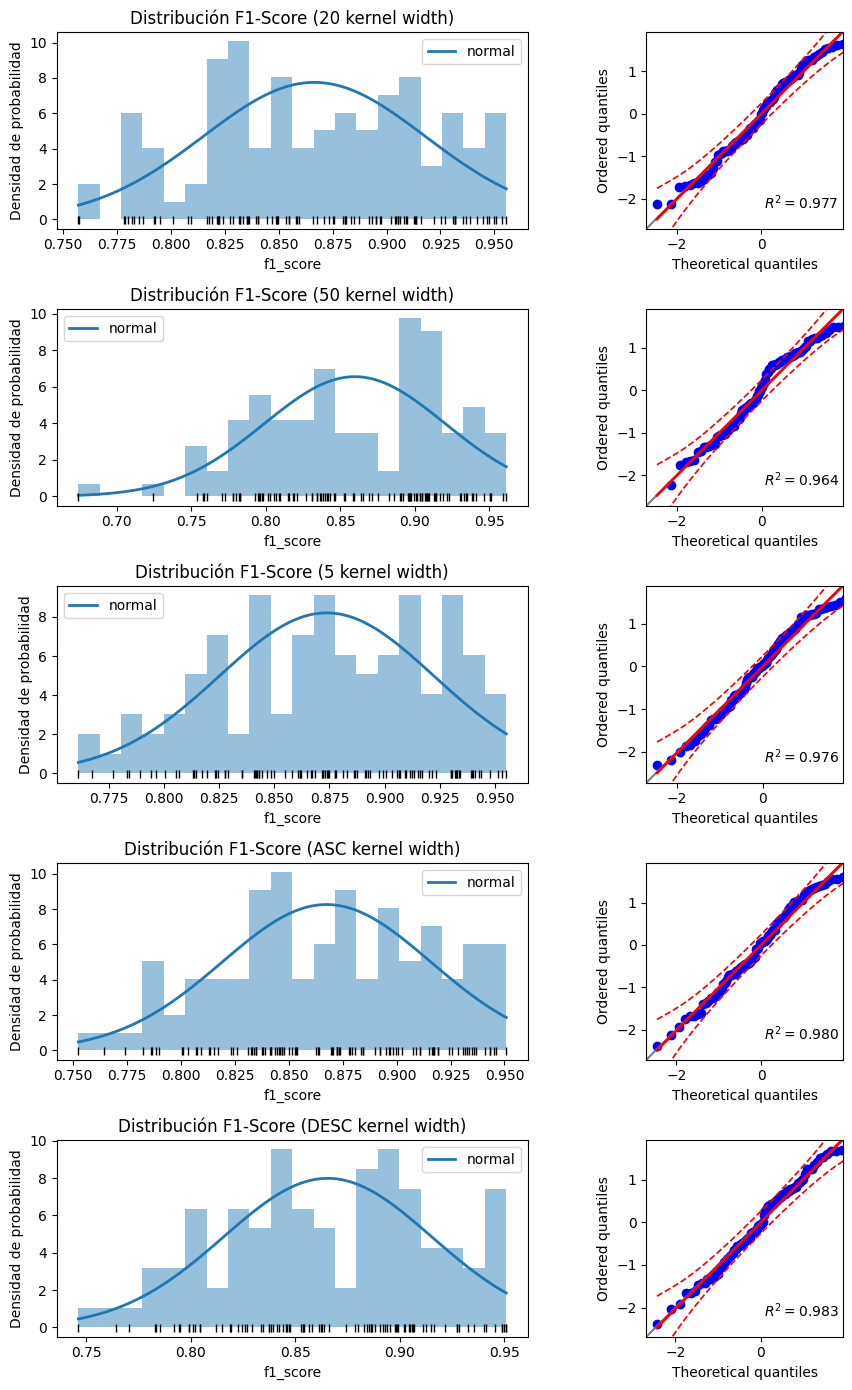

In [34]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(5, 2, figsize=(10, 14))

f1_score_20_kernel = df.loc[df.kernel_widths == '20_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_20_kernel)
x_hat = np.linspace(min(f1_score_20_kernel), max(f1_score_20_kernel), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=f1_score_20_kernel, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(f1_score_20_kernel, np.full_like(f1_score_20_kernel, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución F1-Score (20 kernel width)')
axs[0, 0].set_xlabel('f1_score')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()
pg.qqplot(f1_score_20_kernel, dist='norm', ax=axs[0, 1])

f1_score_50_kernel = df.loc[df.kernel_widths == '50_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_50_kernel)
x_hat = np.linspace(min(f1_score_50_kernel), max(f1_score_50_kernel), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=f1_score_50_kernel, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(f1_score_50_kernel, np.full_like(f1_score_50_kernel, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución F1-Score (50 kernel width)')
axs[1, 0].set_xlabel('f1_score')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()
pg.qqplot(f1_score_50_kernel, dist='norm', ax=axs[1, 1])

f1_score_5_kernel = df.loc[df.kernel_widths == '5_cte', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_5_kernel)
x_hat = np.linspace(min(f1_score_5_kernel), max(f1_score_5_kernel), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[2, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[2, 0].hist(x=f1_score_5_kernel, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[2, 0].plot(f1_score_5_kernel, np.full_like(f1_score_5_kernel, -0.01), '|k', markeredgewidth=1)
axs[2, 0].set_title('Distribución F1-Score (5 kernel width)')
axs[2, 0].set_xlabel('f1_score')
axs[2, 0].set_ylabel('Densidad de probabilidad')
axs[2, 0].legend()
pg.qqplot(f1_score_5_kernel, dist='norm', ax=axs[2, 1])

f1_score_asc_kernel = df.loc[df.kernel_widths == 'ASC', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_asc_kernel)
x_hat = np.linspace(min(f1_score_asc_kernel), max(f1_score_asc_kernel), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[3, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[3, 0].hist(x=f1_score_asc_kernel, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[3, 0].plot(f1_score_asc_kernel, np.full_like(f1_score_asc_kernel, -0.01), '|k', markeredgewidth=1)
axs[3, 0].set_title('Distribución F1-Score (ASC kernel width)')
axs[3, 0].set_xlabel('f1_score')
axs[3, 0].set_ylabel('Densidad de probabilidad')
axs[3, 0].legend()
pg.qqplot(f1_score_asc_kernel, dist='norm', ax=axs[3, 1])

f1_score_desc_kernel = df.loc[df.kernel_widths == 'DESC', 'F1_Score_Media']
mu, sigma = stats.norm.fit(f1_score_desc_kernel)
x_hat = np.linspace(min(f1_score_desc_kernel), max(f1_score_desc_kernel), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[4, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[4, 0].hist(x=f1_score_desc_kernel, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[4, 0].plot(f1_score_desc_kernel, np.full_like(f1_score_desc_kernel, -0.01), '|k', markeredgewidth=1)
axs[4, 0].set_title('Distribución F1-Score (DESC kernel width)')
axs[4, 0].set_xlabel('f1_score')
axs[4, 0].set_ylabel('Densidad de probabilidad')
axs[4, 0].legend()
pg.qqplot(f1_score_desc_kernel, dist='norm', ax=axs[4, 1])

plt.tight_layout();


In [35]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='F1_Score_Media', group='kernel_widths')

,W,pval,normal
kernel_widths,,,
50_cte,0.961164,0.004872,False
20_cte,0.969813,0.021390,False
5_cte,0.969801,0.019429,False
ASC,0.973835,0.043751,False
DESC,0.976581,0.096315,True


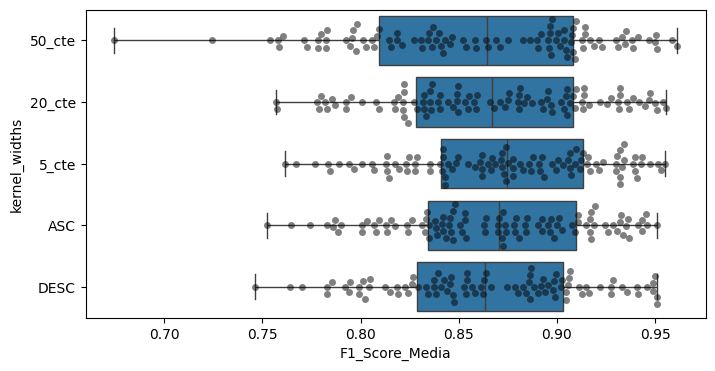

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="kernel_widths", x="F1_Score_Media", data=df, ax=ax)
sns.swarmplot(y="kernel_widths", x="F1_Score_Media", data=df, color='black', alpha = 0.5, ax=ax);

In [37]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='F1_Score_Media', group='kernel_widths')

,W,pval,equal_var
levene,3.09844,0.015491,False


In [38]:
grupos = df['kernel_widths'].unique()

# Crear un DataFrame para almacenar los resultados
resultados_list = []

# Realizar pruebas t para cada combinación de grupos
for i in range(len(grupos)):
    for j in range(i + 1, len(grupos)):
        group1 = df.loc[df['kernel_widths'] == grupos[i], 'F1_Score_Media']
        group2 = df.loc[df['kernel_widths'] == grupos[j], 'F1_Score_Media']
        ttest_res = pg.ttest(x=group1, y=group2, alternative='two-sided', correction=False)
        resultados_list.append({
            'Group1': grupos[i],
            'Group2': grupos[j],
            'T-statistic': np.abs(ttest_res['T'][0]),
            'p-value': ttest_res['p-val'][0]
        })

/tmp/ipykernel_1889764/2185829184.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'T-statistic': np.abs(ttest_res['T'][0]),
/tmp/ipykernel_1889764/2185829184.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'p-value': ttest_res['p-val'][0]
/tmp/ipykernel_1889764/2185829184.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'T-statistic': np.abs(ttest_res['T'][0]),
/tmp/ipykernel_1889764/2185829184.py:16: FutureWarning: Se

In [39]:
# Convertir la lista de resultados a un DataFrame
resultados = pd.DataFrame(resultados_list)

print(resultados)

   Group1  Group2  T-statistic   p-value
0  50_cte  20_cte     0.845976  0.398587
1  50_cte   5_cte     1.801764  0.073089
2  50_cte     ASC     1.005374  0.315944
3  50_cte    DESC     0.716701  0.474439
4  20_cte   5_cte     1.022911  0.307585
5  20_cte     ASC     0.151196  0.879975
6  20_cte    DESC     0.130306  0.896463
7   5_cte     ASC     0.900128  0.369135
8   5_cte    DESC     1.152314  0.250625
9     ASC    DESC     0.285183  0.775815
